In [3]:
#安裝python套件
import matplotlib.pyplot as plt
import csv
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [4]:
#設置欄位名稱並讀取資料集之csv檔
cols=["Answer","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment",
      "gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring",
      "stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color",
      "ring-number","ring-type","spore-print-color","population","habitat"]
df=pd.read_csv('agaricus-lepiota.csv',header=None,names=cols)

In [5]:
df

,Answer,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [8]:
#查看資料型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Answer                    8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#將讀取之資料集設為程式內之變數
df2=df
df2

,Answer,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
#資料預處理函式
def Preprocess(data):
    #將缺失值刪掉
    try:
        data = data.replace('?', np.NaN)#將資料集內之問號替換為NaN
        data.dropna(inplace=True)#將包含NaN之資料列刪除
    except:
        pass
    #將資料集內之文字轉數字
    labelencoder = LabelEncoder()
    for i in range(len(data.columns)):
        if data[data.columns[i]].dtypes==object:
            data[data.columns[i]] = labelencoder.fit_transform(data[data.columns[i]]).astype(np.int64)
    return data

In [7]:
df2=Preprocess(df2)
df2

,Answer,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,2,...,2,5,5,0,0,1,3,1,3,5
1,0,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
2,0,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3
3,1,5,3,6,1,6,1,0,1,3,...,2,5,5,0,0,1,3,1,3,5
4,0,5,2,3,0,5,1,1,0,2,...,2,5,5,0,0,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0,0,3,4,0,5,1,0,0,7,...,3,3,3,0,0,2,3,5,5,4
8001,0,5,3,4,0,5,1,0,0,7,...,3,3,3,0,0,2,3,5,5,4
8038,0,5,3,3,1,5,1,0,0,7,...,2,5,5,0,0,2,3,5,5,4
8095,1,5,3,1,0,4,1,0,0,8,...,3,1,1,0,0,0,2,5,1,0


In [8]:
#分配訓練資料、測試資料
x_train = df2.sample(frac=0.7,random_state=100)
x_test= df2[~df2.index.isin(x_train.index)]

In [9]:
#設定答案
y_train = x_train.pop('Answer')
y_test = x_test.pop('Answer')

In [10]:
x_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
680,5,2,6,1,3,1,1,1,3,1,...,2,5,5,0,0,1,3,2,4,0
5728,2,2,3,1,2,1,0,0,4,1,...,2,5,5,0,0,1,3,0,4,5
3345,2,3,3,1,5,1,0,0,6,1,...,2,5,2,0,0,1,3,1,4,0
807,5,3,7,1,0,1,0,0,4,0,...,3,5,5,0,0,1,3,1,5,1
3475,2,3,3,1,5,1,0,0,3,1,...,2,4,5,0,0,1,3,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,2,3,3,1,5,1,0,0,4,1,...,2,4,4,0,0,1,3,2,4,0
1121,2,0,6,0,5,1,1,0,2,1,...,0,5,5,0,0,1,0,1,0,1
5159,2,2,3,1,2,1,0,0,7,1,...,0,5,5,0,0,1,3,0,4,1
1975,2,3,6,1,6,1,0,1,3,0,...,2,5,5,0,0,1,3,2,3,1


In [11]:
x_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2,0,2,6,1,3,1,0,0,3,0,...,2,5,5,0,0,1,3,2,2,3
3,5,3,6,1,6,1,0,1,3,0,...,2,5,5,0,0,1,3,1,3,5
6,0,2,6,1,0,1,0,0,0,0,...,2,5,5,0,0,1,3,1,2,3
7,0,3,6,1,3,1,0,0,3,0,...,2,5,5,0,0,1,3,2,3,3
11,5,3,7,1,0,1,0,0,3,0,...,2,5,5,0,0,1,3,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7940,2,3,3,1,5,1,0,0,7,0,...,2,5,5,0,0,2,3,5,5,4
7981,3,3,1,0,4,0,0,0,8,0,...,3,1,1,0,0,0,2,5,1,0
8001,5,3,4,0,5,1,0,0,7,0,...,3,3,3,0,0,2,3,5,5,4
8095,5,3,1,0,4,1,0,0,8,0,...,3,1,1,0,0,0,2,5,1,0


In [12]:
y_train

680     0
5728    1
3345    0
807     0
3475    0
       ..
3055    0
1121    0
5159    1
1975    1
1804    0
Name: Answer, Length: 3951, dtype: int64

In [13]:
y_test

2       0
3       1
6       0
7       0
11      0
       ..
7940    0
7981    1
8001    0
8095    1
8114    1
Name: Answer, Length: 1693, dtype: int64

In [38]:
#決策樹模型
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf = clf.fit(x_train,y_train)

In [39]:
clf.score(x_train,y_train)#訓練集績效

0.9374841812199444

In [40]:
clf.score(x_test,y_test)#測試集績效

0.9403425871234495

[Text(0.4, 0.8333333333333334, 'X[19] <= 0.5\nentropy = 0.952\nsamples = 3951\nvalue = [2480, 1471]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 1100\nvalue = [0, 1100]'),
 Text(0.6, 0.5, 'X[7] <= 0.5\nentropy = 0.558\nsamples = 2851\nvalue = [2480, 371]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.202\nsamples = 2383\nvalue = [2308, 75]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.949\nsamples = 468\nvalue = [172, 296]')]

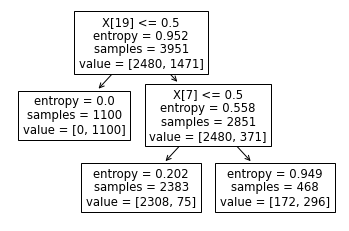

In [41]:
tree.plot_tree(clf)#顯示決策樹

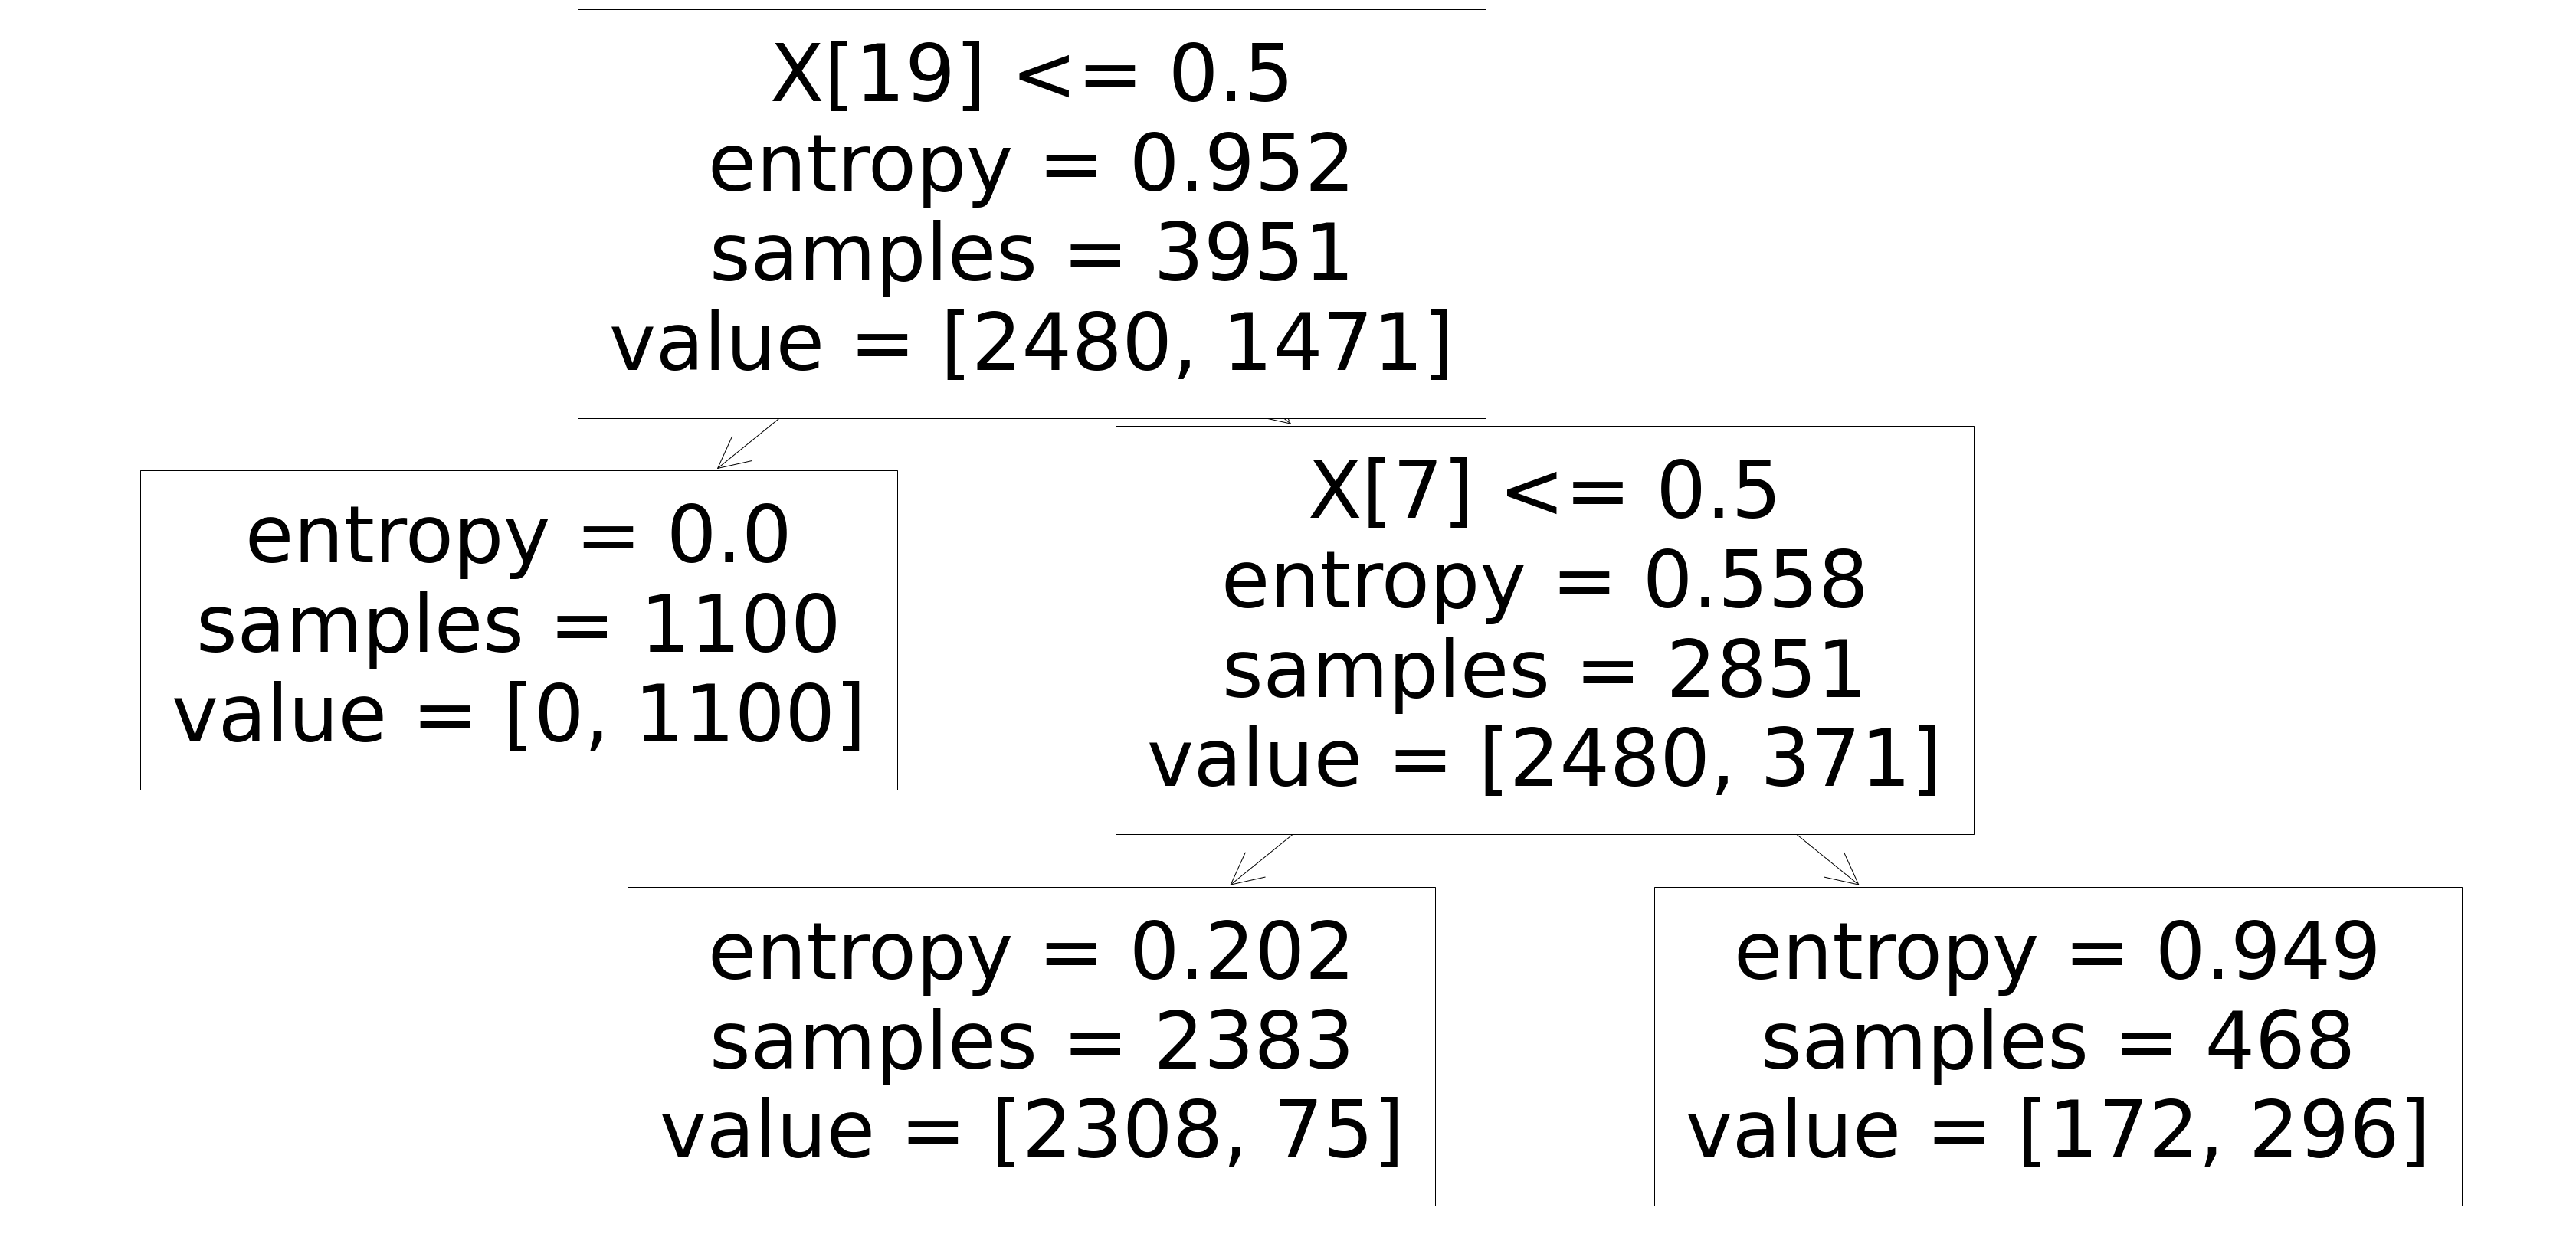

In [42]:
fig,ax=plt.subplots(figsize=(60,30)) #放大決策樹圖
tree.plot_tree(clf,ax=ax);

In [43]:
#將資料集以及預測答案和實際答案存成excel檔
df_outer = x_test.join(y_test, how='outer')
df_outer['predict'] = clf.predict(x_test)
df_outer['result'] = (df_outer['Answer'] == df_outer['predict'])
df_outer.to_excel("agaricus-lepiota_entropy_depth2.xlsx")  